Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Regresión lineal en PyTorch

Basado en

https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

In [1]:
%matplotlib widget

In [2]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
style = "./clean.mplstyle"
plt.style.use(style)

## Generación de datos

Creemos una función entre -10 y 10 con pendiente 3

In [5]:
npts = 1000
X = torch.linspace(-10, 10, npts).view(-1, 1)
fun = 3 * X

Agreguemos algo de ruido a los datos

In [6]:
Y = fun + 3 * torch.randn(X.size())

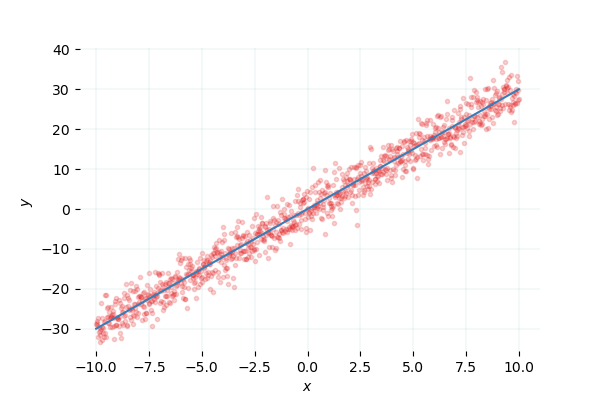

In [7]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), fun.numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Modelo

Definamos un modelo lineal

In [8]:
def forward(x):
    return w * x

La función de pérdida es el error cuadrático medio

In [25]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [26]:
w = torch.tensor(10.0, requires_grad=True)

In [27]:
step_size = 0.01
loss_list = []
niter = 100

In [28]:
for cont in range (niter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())
    loss.backward()
    w.data = w.data - step_size * w.grad.data
    w.grad.data.zero_()

    if cont % 10 == 0:
        print('{},\t{},\t{}'.format(cont, loss.item(), w.item()))

0,	1653.1256103515625,	5.313168525695801
10,	8.938098907470703,	2.983837127685547
20,	8.93809986114502,	2.9837992191314697
30,	8.93809986114502,	2.9837992191314697
40,	8.93809986114502,	2.9837992191314697
50,	8.93809986114502,	2.9837992191314697
60,	8.93809986114502,	2.9837992191314697
70,	8.93809986114502,	2.9837992191314697
80,	8.93809986114502,	2.9837992191314697
90,	8.93809986114502,	2.9837992191314697


Grafiquemos la función de pérdida luego de cada iteración

Text(0, 0.5, 'Pérdida')

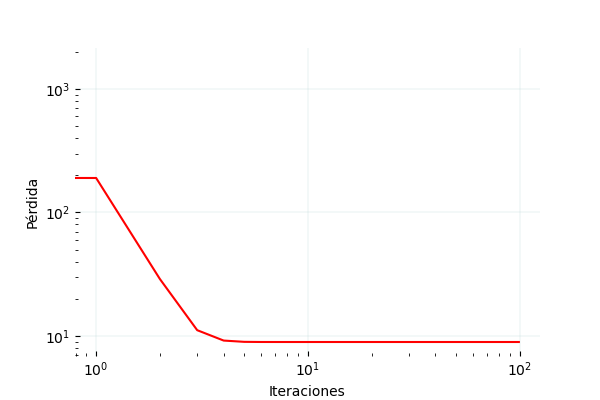

In [30]:
plt.figure()
plt.loglog(loss_list, 'r')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")